
<div style="background-color: #121212; color: #00e5ff; font-weight: bold; padding: 18px; border-radius: 18px; text-align: center; font-size: 45px; box-shadow: 0 0 15px #00e5ff;">
Trump_coin_historical_data ♨️
</div>

<div style="background-color:#111; color:#00ffcc; font-weight:700; padding:18px; border-radius:18px; text-align:center; font-size:30px; border:2px solid #00ffcc;">
 📚 IMPORT LIBRARIES, ALGORITHMS, AND METRICS
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import skfuzzy as fuzz
from tabulate import tabulate

<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 30px;">
LOAD DATASET
</div>

In [2]:
df=pd.read_csv(r"C:\Users\Ashfidha\Downloads\trump_coin_historical_data.csv")

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,2025-07-17 00:00:00,10.00,10.39,9.93,10.27,1.536909e+06
1,2025-07-16 00:00:00,9.48,10.49,9.34,9.87,1.366981e+08
2,2025-07-15 00:00:00,9.43,9.51,9.00,9.48,5.341373e+07
3,2025-07-14 00:00:00,9.54,9.95,9.23,9.43,6.985416e+07
4,2025-07-13 00:00:00,9.60,9.89,9.46,9.53,5.151253e+07
...,...,...,...,...,...,...
175,2025-01-23 00:00:00,36.86,39.84,34.00,34.69,1.477727e+09
176,2025-01-22 00:00:00,43.76,44.55,36.10,36.86,1.300438e+10
177,2025-01-21 00:00:00,36.51,48.33,30.40,43.76,4.526745e+09
178,2025-01-20 00:00:00,46.49,63.99,34.50,36.50,4.615559e+09


<style>
td, th { padding:10px; }
th { background:#8B0000; color:white; }
tr:nth-child(even) { background:#ffe6e6; }
tr:nth-child(odd) { background:#ffffff; }
</style>

<table>
<tr>
<th>Column Name</th><th>Description</th><th>Data Type</th><th>Purpose / Use</th>
</tr>

<tr>
<td><b>Date</b></td>
<td>Trading date or timestamp of the market data</td>
<td>Date / DateTime</td>
<td>Tracks price movement over time; used for time-series analysis</td>
</tr>

<tr>
<td><b>Open</b></td>
<td>Price at which the asset opened for the trading period</td>
<td>Numeric (Float)</td>
<td>Indicates initial market sentiment</td>
</tr>

<tr>
<td><b>High</b></td>
<td>Highest price reached during the trading period</td>
<td>Numeric (Float)</td>
<td>Measures maximum buying pressure</td>
</tr>

<tr>
<td><b>Low</b></td>
<td>Lowest price reached during the trading period</td>
<td>Numeric (Float)</td>
<td>Measures maximum selling pressure</td>
</tr>

<tr>
<td><b>Close</b></td>
<td>Price at which the asset closed for the trading period</td>
<td>Numeric (Float)</td>
<td>Most important price for trend and return analysis</td>
</tr>

<tr>
<td><b>Volume</b></td>
<td>Total quantity of assets traded during the period</td>
<td>Numeric (Integer)</td>
<td>Shows market activity, liquidity, and strength of price moves</td>
</tr>

</table>


<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 30px;">
CHECKING COLUMNS,SHAPE,INFO,UNIQUE
</div>

In [4]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [5]:
df.shape

(180, 6)

for j in df:
    print([j])
    print(df[j].unique())
    print(df[j].nunique())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    180 non-null    object 
 1   Open    180 non-null    float64
 2   High    180 non-null    float64
 3   Low     180 non-null    float64
 4   Close   180 non-null    float64
 5   Volume  180 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.6+ KB


<div style="background-color:#111; color:#00ffcc; font-weight:700; padding:18px; border-radius:18px; text-align:center; font-size:40px; border:2px solid #00ffcc;">
DATA-PREPROCESSING
</div>

<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 7px; border-radius: 15px; text-align: center; font-size: 30px;">
MISSING VALUE HANDLING
</div>

In [7]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Here we can see no missing values to handle

In [8]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [9]:
df= df.drop(['Date', 'Volume'],axis=1)
df

,Open,High,Low,Close
0,10.00,10.39,9.93,10.27
1,9.48,10.49,9.34,9.87
2,9.43,9.51,9.00,9.48
3,9.54,9.95,9.23,9.43
4,9.60,9.89,9.46,9.53
...,...,...,...,...
175,36.86,39.84,34.00,34.69
176,43.76,44.55,36.10,36.86
177,36.51,48.33,30.40,43.76
178,46.49,63.99,34.50,36.50


In [10]:
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 30px;">
SCALING
</div>

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 30px;">
PCA
</div>

In [12]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 30px;">
K-MEANS
</div>

  File "C:\Users\Ashfidha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Ashfidha\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ashfidha\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ashfidha\anaconda3\Lib

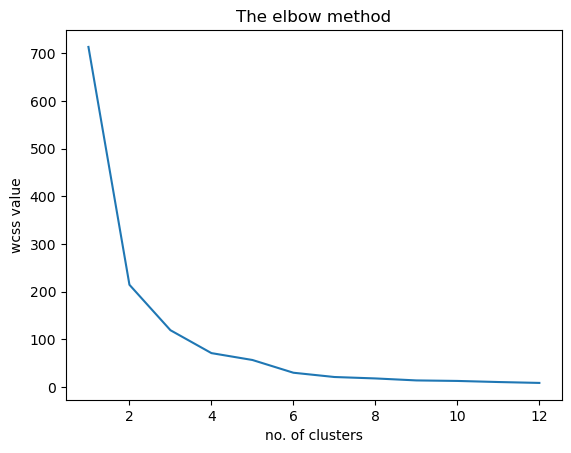

In [13]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss value')
plt.show()

### This plot uses the **Elbow Method** to find the best number of clusters. The WCSS value drops sharply up to about 2 or 3 clusters, then levels off. The "elbow" at 2-3 clusters suggests that’s the optimal number to choose for good clustering without overfitting.

In [14]:
type(pca_data)

numpy.ndarray

In [15]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(pca_data)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [16]:
score1 = silhouette_score(pca_data, y_kmeans)

print("Silhouette Score:", score1)

Silhouette Score: 0.8096490637383188


<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 30px;">
DBSCAN CLUSTERING
</div>

In [17]:
epsilon =0.8
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(pca_data)


In [18]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1])

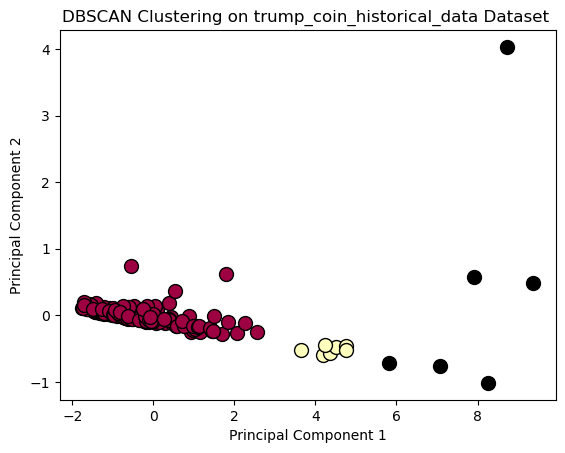

In [19]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)
    xy = pca_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on trump_coin_historical_data Dataset ")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [20]:
unique_labels

{np.int64(-1), np.int64(0), np.int64(1)}

### The DBSCAN result shows a **some dense cluster** where most data points lie, indicating **normal and consistent behavior** in the dataset.
### A small separate cluster represents a different but still regular pattern.
### The points far away from these clusters are **outliers**, showing abnormal or extreme events.
### Overall, the dataset is mostly stable, with occasional unusual movements clearly identified by DBSCAN.


In [21]:
score2 = silhouette_score(pca_data, labels)

print("Silhouette Score:", score2)

Silhouette Score: 0.7425092077406722



<div style="background-color:#111; color:#00ffcc; font-weight:700; padding:18px; border-radius:18px; text-align:center; font-size:40px; border:2px solid #00ffcc;">
HIERARCHICAL CLUSTERING
</div>

<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 30px;">
DENDROGRAM CLUSTERING
</div>

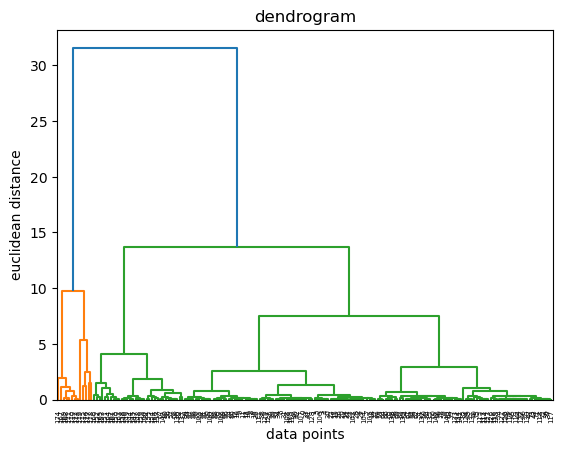

In [22]:
dendrogram=sch.dendrogram(sch.linkage(pca_data,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

### The dendrogram shows **hierarchical clustering using Euclidean distance**.
### Points merging at **low heights are very similar**, while **large vertical gaps** indicate **well-separated clusters**.
### Cutting the tree around **15–30 above distance** gives **2 clusters**

<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 30px;">
AGGLOMERATIVE CLUSTERING
</div>

In [23]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(pca_data)
y_ahc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [24]:
score3=silhouette_score(pca_data,y_ahc)
print(score3)

0.8096490637383188


<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 30px;">
FUZZY CLUSTERING
</div>

In [25]:
data=pca_data.T

In [26]:
jm_values = []
cluster_range = range(2, 11)

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=data,
        c=c,
        m=2,
        error=0.005,
        maxiter=1000,
        init=None
    )
    jm_values.append(jm[-1])  # Final objective value


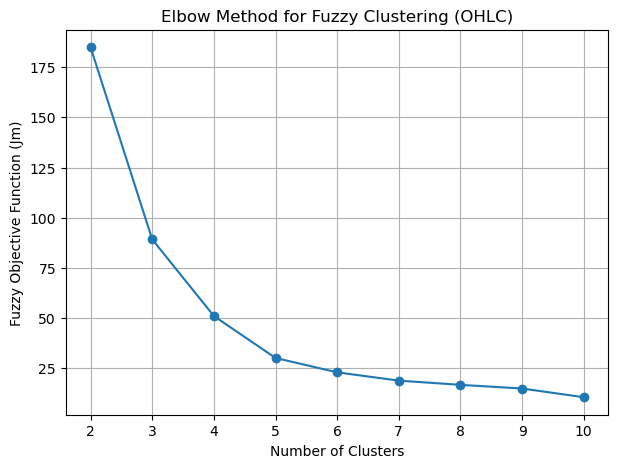

In [27]:
plt.figure(figsize=(7,5))
plt.plot(cluster_range, jm_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Fuzzy Objective Function (Jm)")
plt.title("Elbow Method for Fuzzy Clustering (OHLC)")
plt.grid(True)
plt.show()


### By elbow method we can get the number of clusters,so we asign it do the remaing fuzzy cluster

In [28]:
n_clusters = 4

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=data,
    c=n_clusters,
    m=2,
    error=0.005,
    maxiter=1000
)

In [29]:
hard_clusters = np.argmax(u, axis=0)

In [30]:
score4=silhouette_score(pca_data,hard_clusters)
print(score4)

0.5825223315701374


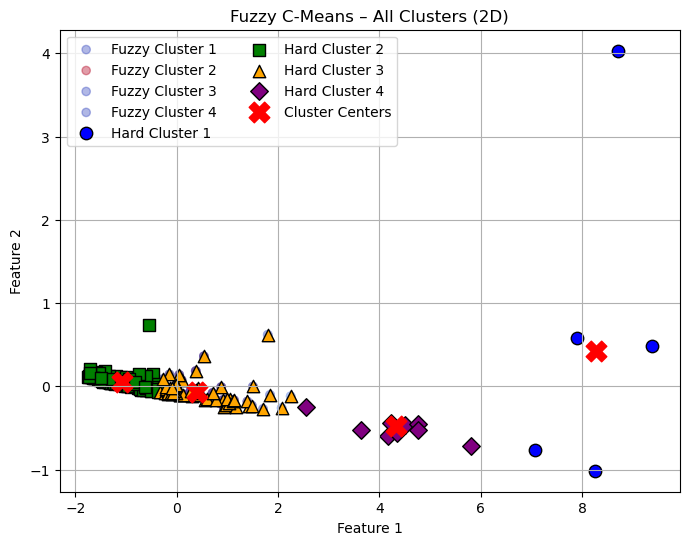

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))


for i in range(n_clusters):
    ax.scatter(
        data[0],        
        data[1],        
        c=u[i],
        cmap='coolwarm',
        alpha=0.4,
        label=f'Fuzzy Cluster {i+1}'
    )

hard_clusters = np.argmax(u, axis=0)

markers = ['o', 's', '^', 'D']
colors = ['blue', 'green', 'orange', 'purple']

for i in range(n_clusters):
    cluster_points = data[:, hard_clusters == i]
    ax.scatter(
        cluster_points[0],
        cluster_points[1],  
        c=colors[i],
        marker=markers[i],
        edgecolor='k',
        s=80,
        label=f'Hard Cluster {i+1}'
    )
ax.scatter(
    cntr[:, 0],
    cntr[:, 1],  
    c='red',
    marker='X',
    s=220,
    label='Cluster Centers'
)

ax.set_title('Fuzzy C-Means – All Clusters (2D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left', ncol=2)
ax.grid(True)

plt.show()


### The image shows Fuzzy C-Means clustering in 2D.
### Points belong to clusters with varying degrees (fuzzy), while hard labels show their strongest cluster assignment.
### Red X marks indicate the cluster centers

<div style="background-color: #263238; color: #eceff1; font-weight: bold; padding: 5px; border-radius: 15px; text-align: center; font-size: 30px;">
TABLE
</div>

In [32]:
from tabulate import tabulate

table = [
    ['Clustering Method', 'Silhouette Score'],
    ['KMeans', score1],
    ['DBSCAN', score2],
    ['Agglomerative', score3],
    ['Fuzzy C-Means', score4],
   
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═════════════════════╤════════════════════╕
│ Clustering Method   │   Silhouette Score │
╞═════════════════════╪════════════════════╡
│ KMeans              │           0.809649 │
├─────────────────────┼────────────────────┤
│ DBSCAN              │           0.742509 │
├─────────────────────┼────────────────────┤
│ Agglomerative       │           0.809649 │
├─────────────────────┼────────────────────┤
│ Fuzzy C-Means       │           0.582522 │
╘═════════════════════╧════════════════════╛


In [33]:
# Add cluster labels to the original dataframe
df['Kmeans_Cluster'] = y_kmeans  # assuming y_kmeans contains your cluster labels

# Numeric summary per cluster
cluster_summary = df.groupby('Kmeans_Cluster')[['Open', 'High', 'Low', 'Close']].mean().round(2)
cluster_summary['Count'] = df['Kmeans_Cluster'].value_counts()

# If you have categorical columns in the coin dataset, e.g., 'CoinType' and 'Exchange'
if 'CoinType' in df.columns and 'Exchange' in df.columns:
    cluster_summary['Most_Common_Coin'] = df.groupby('Kmeans_Cluster')['CoinType'].agg(lambda x: x.value_counts().idxmax())
    cluster_summary['Most_Common_Exchange'] = df.groupby('Kmeans_Cluster')['Exchange'].agg(lambda x: x.value_counts().idxmax())

print("Trump Coin Historical Dataset Cluster Summary (KMeans c=2):")
print(cluster_summary)



Trump Coin Historical Dataset Cluster Summary (KMeans c=2):
                 Open   High    Low  Close  Count
Kmeans_Cluster                                   
0               11.87  12.49  11.19  11.78    167
1               32.36  39.59  28.51  32.12     13


| Column Name     | Description                                           | Cluster Interpretation                   |
|-----------------|-------------------------------------------------------|-----------------------------------------|
| Open            | Opening price in USD                                   | 0: low (~$11.87), 1: high (~$32.36)    |
| High            | Highest price in USD                                   | 0: low (~$12.49), 1: high (~$39.59)    |
| Low             | Lowest price in USD                                    | 0: low (~$11.19), 1: high (~$28.51)    |
| Close           | Closing price in USD                                   | 0: low (~$11.78), 1: high (~$32.12)    |
| Count           | Number of data points per cluster                      | 0: 167, 1: 13                            |
| Kmeans_Cluster  | KMeans cluster label (0 or 1)                          | 0: lower-price days, 1: higher-price days|
